# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [0]:
df[features].describe()

# both have equal counts
# means are relatively close
# std difference is high
# free fare could mean employees
# not much discrepancy in interquartile ranges

,age,fare
count,714.000000,714.000000
mean,29.699118,34.694514
std,14.526497,52.918930
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,33.375000
max,80.000000,512.329200


Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

Text(0, 0.5, '# of purchases')

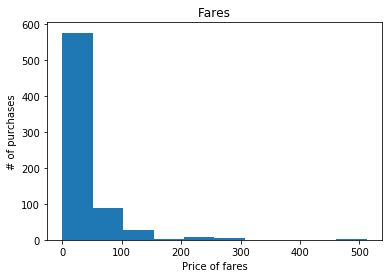

In [0]:
plt.hist(df.fare)
plt.title("Fares")
plt.xlabel("Price of fares")
plt.ylabel("# of purchases")

Text(0, 0.5, '# of passengers')

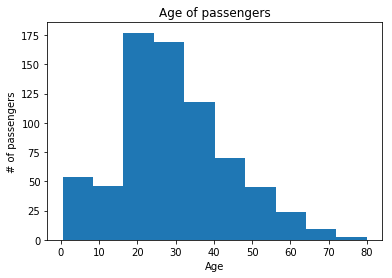

In [0]:
plt.hist(df.age)
plt.title("Age of passengers")
plt.xlabel("Age")
plt.ylabel("# of passengers")

# both are right-skewed
# fares are usually less than ~50 but mean is about 35
# most passengers are in their 20s and 30s -> mean is close to 30

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


In [0]:
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']

(array([1.6438e+04, 0.0000e+00, 2.0503e+04, 0.0000e+00, 1.0229e+04,
        0.0000e+00, 2.4950e+03, 0.0000e+00, 3.1800e+02, 1.7000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

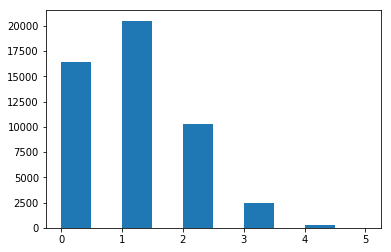

In [0]:
def mc():
  dishbreakers = [random.choice(dishwashers) for _ in range(5)]
  return dishbreakers.count('Carl')

mc_dishbreak = [mc() for _ in range(50000)]

plt.hist(mc_dishbreak)

In [0]:
# mean and std of broken dishes
break_mean = mean(mc_dishbreak)
print("Mean: {}".format(break_mean))
break_std = stdev(mc_dishbreak)
print("STD: {}".format(break_std))

Mean: 0.99606
STD: 0.8919755539294651


In [0]:
# z-score of breaking two dishes
zscore = (2 - mean(mc_dishbreak)) / stdev(mc_dishbreak)
print("Z score: {}".format(zscore))

Z score: 1.1255241195538288


In [0]:
# p-value for breaking two dishes
pvalue2 = sum(dishbreak >= 2 for dishbreak in mc_dishbreak)

# p-value percentage for breaking two
pvalue_perc2 = sum(dishbreak >= 2 for dishbreak in mc_dishbreak) / len(mc_dishbreak)

# if p-value is less than 5% then we reject null hypothesis
# otherwise accept it
if pvalue2 < .05:
  print(
      "Reject null hypothesis. P-value of Carl breaking two dishes is {}, he is clumsy.\n".format(pvalue2),
      "Percentage of that happening is {}%".format(pvalue_perc2)
  )
else:
  print(
      "Accept null hypothesis. P-value of Carl breaking two dishes is {}, he is unlucky.\n".format(pvalue2),
      "Percentage of that happening is {}%".format(pvalue_perc2)
  )

Accept null hypothesis. P-value of Carl breaking two dishes is 13059, he is unlucky.
 Percentage of that happening is 0.26118%


In [0]:
# p-value for breaking four out of five dishes
pvalue4 = sum(dishbreak >= 4 for dishbreak in mc_dishbreak)

# p-value percentage for breaking four dishes
pvalue_perc4 = sum(dishbreak >= 4 for dishbreak in mc_dishbreak) / len(mc_dishbreak)

# if p-value is less than 5% then we reject null hypothesis
# otherwise accept it
if pvalue4 < .05:
  print(
      "Reject null hypothesis. P-value of Carl breaking four dishes is {}, he is clumsy.\n".format(pvalue4),
      "Percentage of that happening is {}%".format(pvalue_perc4)
  )
else:
  print(
      "Accept null hypothesis. P-value of Carl breaking four dishes is {}, he is unlucky.\n".format(pvalue4),
      "Percentage of that happening is {}%".format(pvalue_perc4)
  )

Accept null hypothesis. P-value of Carl breaking four dishes is 335, he is unlucky.
 Percentage of that happening is 0.0067%


# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [0]:
def twodice(x):
  rolls = []
  for i in range(x):
    dice = random.randint(1,6) + random.randint(1,6)
    rolls.append(dice)
  return rolls

rolls = twodice(10000)
twodice_mean = mean(rolls)
print("Mean of rolling two dice 10,000 times: {}".format(twodice_mean))
twodice_std = stdev(rolls)
print("STD: {}".format(twodice_std))

Mean of rolling two dice 10,000 times: 7.0139
STD: 2.4045966394594855


What is the standard score (z score) of rolling a 10?

In [0]:
zscore = (10 - twodice_mean) / twodice_std
print("Z score of rolling a 10 with 10,000 rolls: {}".format(zscore))

Z score of rolling a 10 with 10,000 rolls: 1.2418298982033125


What is the probability of rolling a 10 or higher?

In [0]:
probability = sum(roll >= 10 for roll in rolls)
prob_percent = sum(roll >= 10 for roll in rolls) / len(rolls)
print(
    "Probability of rolling 10 or higher 10,000 times: {}\n".format(probability),
    "Percentage: {}%".format(prob_percent)
)

Probability of rolling 10 or higher 10,000 times: 1682
 Percentage: 0.1682%


# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round((len(x) - 1) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [0]:
# bootstrap resampling for apples out of 10000 samples
mean_apples = [mean(bootstrap_sample(apples)) for _ in range(10000)]
apples_5, apples_95 = percentile(mean_apples, 5), percentile(mean_apples, 95)
print(
    "95% confidence interval for mean apple weight is {}.\n".format(apples_95),
    "5% is {}".format(apples_5)
)

95% confidence interval for mean apple weight is 0.5833333333333333.
 5% is 0.41666666666666663


... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 1, 3, 3, 591]

In [0]:
# bootstrap resampling for pumpkins out of 10000 samples
mean_pumpkins = [mean(bootstrap_sample(pumpkins)) for _ in range(10000)]
pumpkins_5, pumpkins_95 = percentile(mean_pumpkins, 5), percentile(mean_pumpkins, 95)
print(
    "95% confidence interval for mean pumpkin weight is {}\n".format(pumpkins_95),
    "5% is {}".format(pumpkins_5)
)

95% confidence interval for mean pumpkin weight is 296.3333333333333
 5% is 1.3333333333333333
